In [ ]:
!pip install folium

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import plotly.express as px
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading csv file
df= pd.read_csv("hotel_bookings.csv")

In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [ ]:
# Checking first 5 rows
df.head(5)
#from here we can already see , we have some missing values(company, agent)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
#looking for the data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **DATA CLEANING**

First, let's create a copy dataset and not work with the raw data directly.

In [ ]:
# creating a copy of our dataset
df_copy=df.copy()

In [ ]:
# let's check if have all the columns
print(list(df_copy.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# reservation_status_date is not in the right format ( object ), so I needed to convert it to the right data type which is datetime
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
# checking for the duplicate rows
df_copy.duplicated().value_counts()    #true means duplicate rows

,count
False,87396
True,31994


<Axes: xlabel='None', ylabel='count'>

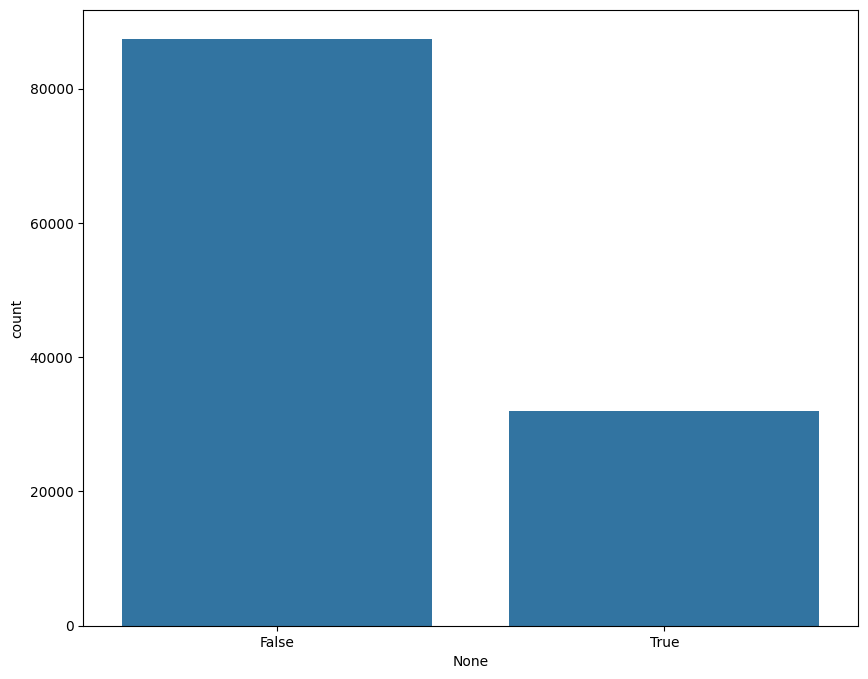

In [ ]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df_copy.duplicated())

So we have 31994 duplicate rows in our data.

In [ ]:
#dropping the duplicate rows
df_copy= df_copy.drop_duplicates()

In [ ]:
# data set reduced
df_copy.shape

(87396, 32)

In [ ]:
# # Handling with NULL values

df_copy[['children', 'agent']].fillna(0)
#  # null value we can consider no children

df_copy['country'].fillna('Unknown')

df_copy = df_copy.drop(columns=['company'])  # Too many missing values



In [ ]:
# Feature Engineering
df_copy['total_guests'] = df_copy['adults'] + df_copy['children'] + df_copy['babies']
df_copy['stay_duration'] = df_copy['stays_in_weekend_nights'] + df_copy['stays_in_week_nights']

In [ ]:
print(list(df_copy.columns))


['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_guests', 'stay_duration']


# **EDA - EXPLORATORY DATA ANALYSIS**

#1) Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Most Preffered  Hotel')

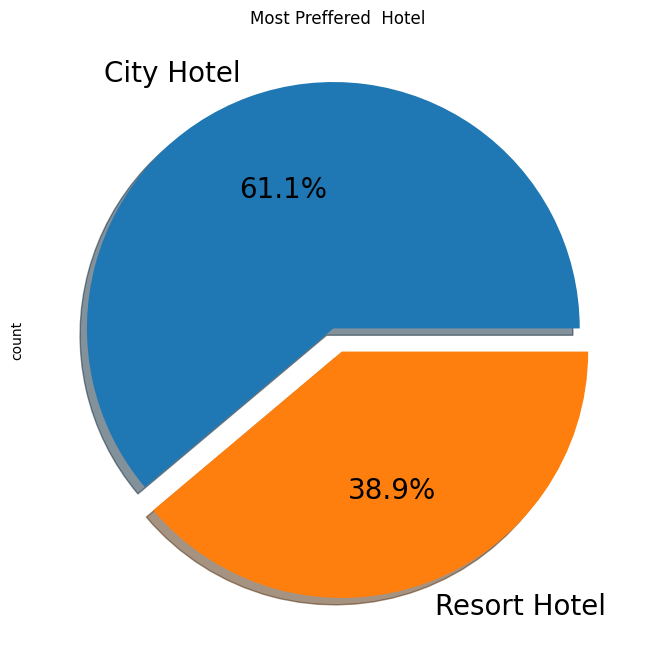

In [ ]:
# Visualizsing the by pie chart.
df_copy['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Most Preffered  Hotel')

### **Observation**
### City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

#2) Which Agent made the most bookings?

In [ ]:
# return highest bookings made by agents
highest_bookings= df_copy.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
8,9.0,28759
173,240.0,13028
13,14.0,3349
6,7.0,3300
182,250.0,2779
174,241.0,1644
26,28.0,1502
7,8.0,1383
0,1.0,1232
5,6.0,1117


Text(0.5, 1.0, 'Booking counts by agents')

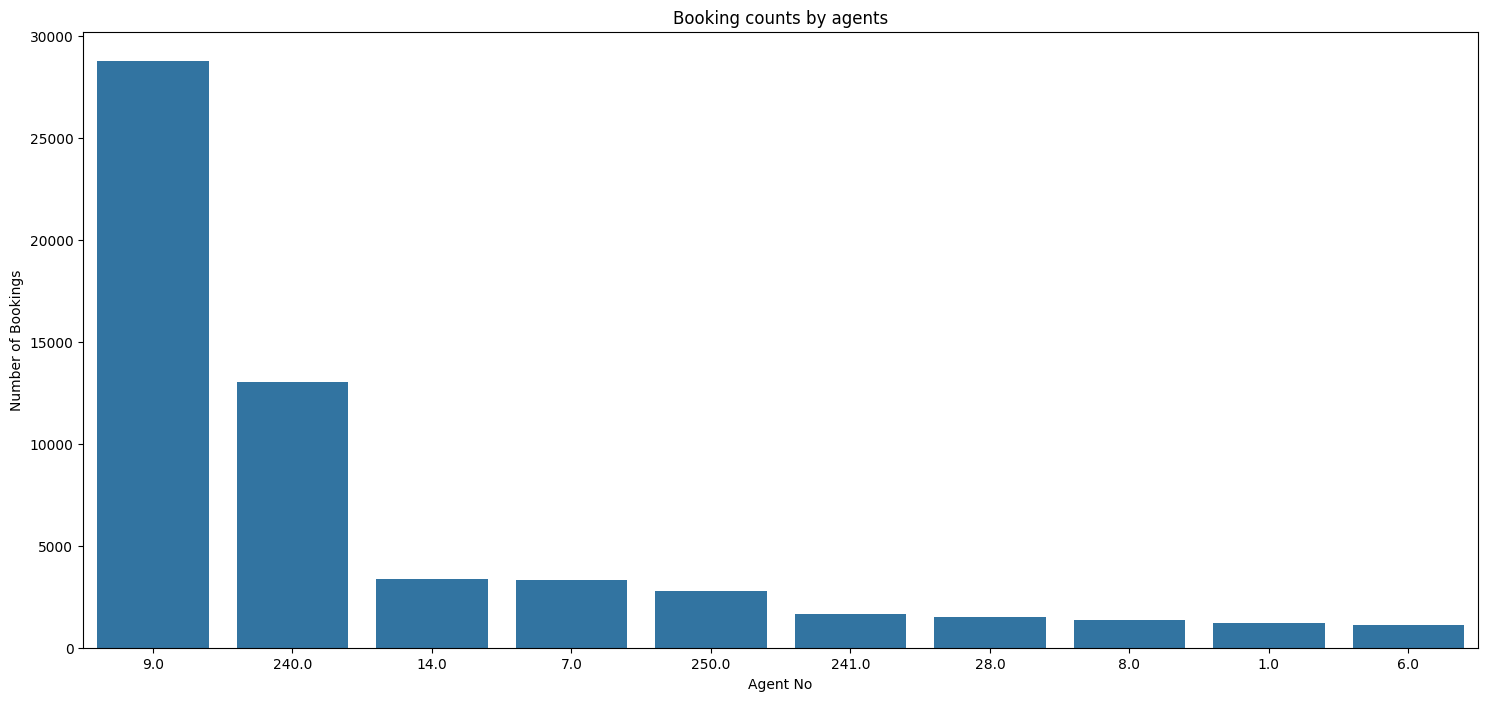

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Booking counts by agents")

### **Observation**
### Agent ID no: 9 made most of the bookings

#3)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

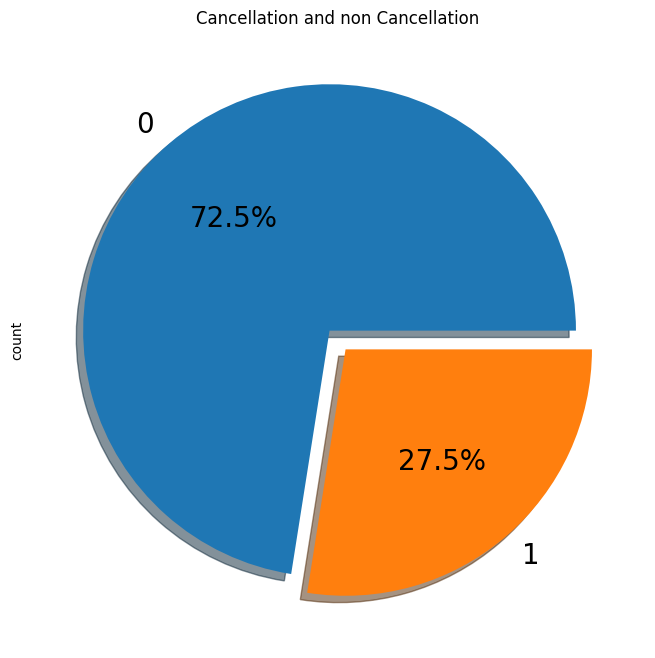

In [ ]:
df_copy['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

### **Observation :**
### 0= not cancled
### 1= canceled

### 27.5 % of the bookings were cancelled.

#4) What is the percentage distribution of "Customer Type"?

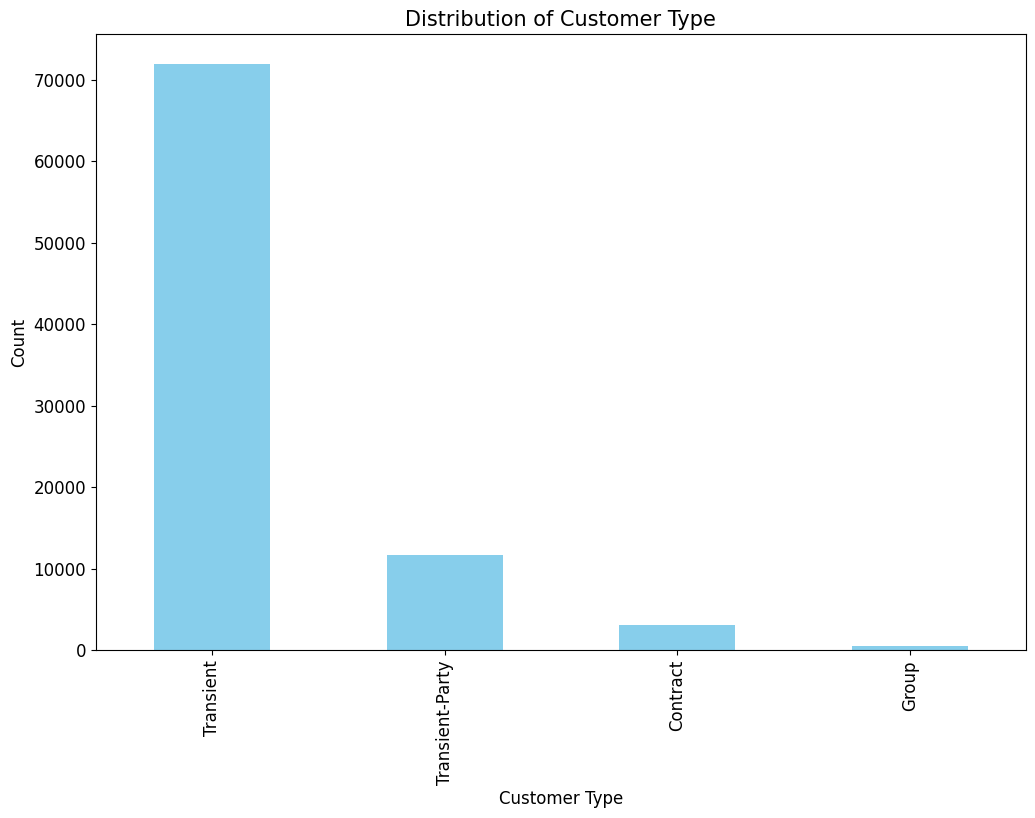

In [ ]:


customer_type_counts = df_copy['customer_type'].value_counts()


customer_type_counts.plot.bar(figsize=(12, 8), color='skyblue', fontsize=12)


plt.title('Distribution of Customer Type', fontsize=15)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)


plt.show()



**1. Transient**
>when the booking is not part of a group or contract, and is not associated to other transient booking

**2. Transient-Party**
> when the booking is transient, but is associated to at least other transient booking

**3. Contract**
>when the booking has an allotment or other type of contract associated to it

**4. Group**
>when the booking is associated to a group

### **Observation:**
### Transient customer type is more whcih is about more than 70k. Bookings associated by the Group is vey low.

# 5) From which country the most guests are coming?

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

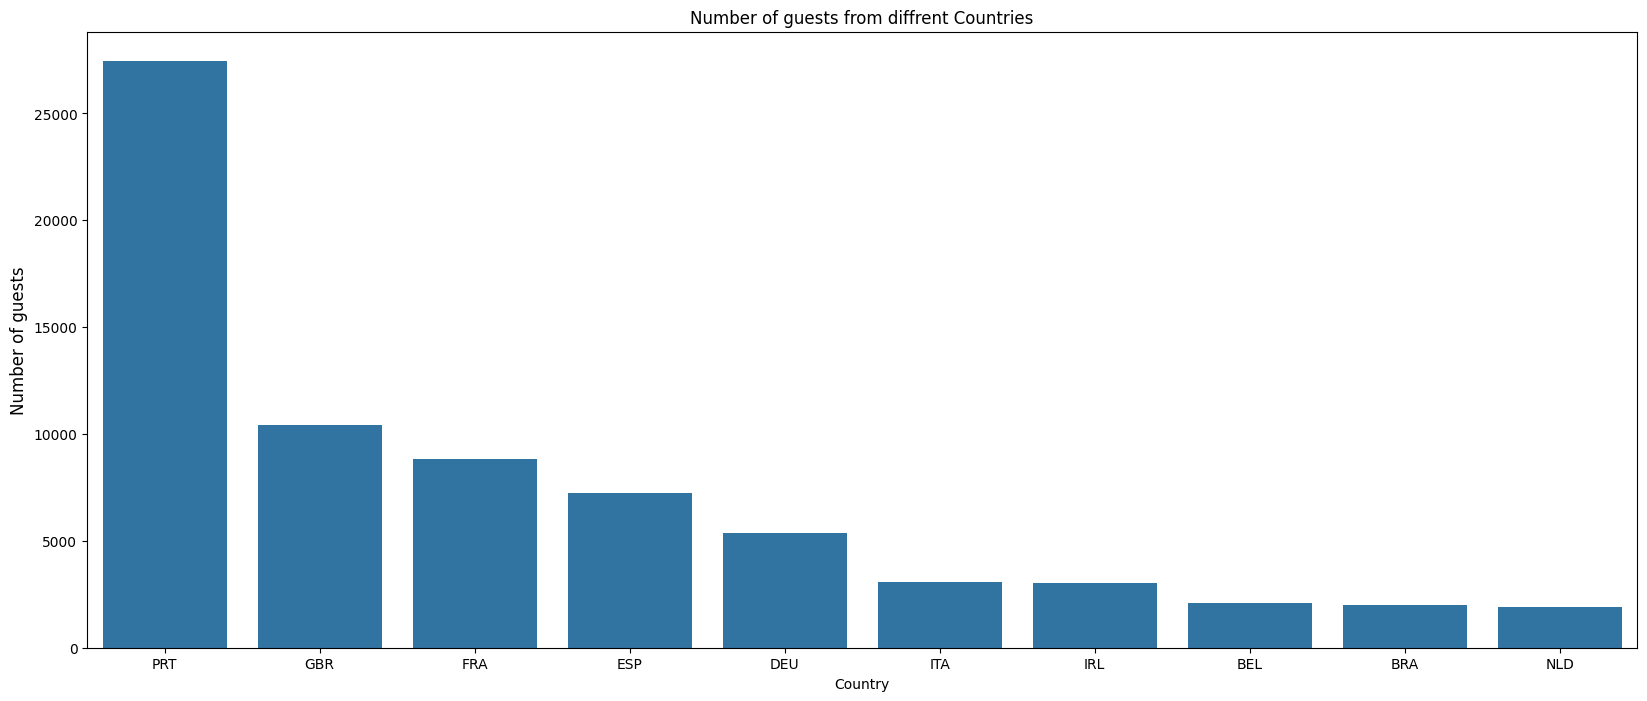

In [ ]:

country_df=df_copy['country'].value_counts().reset_index()[:10]



plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

In [ ]:
country_df=df_copy['country'].value_counts().reset_index()[:10]
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['count'], hover_name = country_df['country'])
guests_map.show()

### **Observation**
### Most of the guests are coming from Portugal i.e more than 48k guests are from Portugal.

abbreevations for countries-



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA - Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





# 6)In which month most of the bookings happened?

In [ ]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df_copy.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by count
bookings_by_months_df = bookings_by_months_df.sort_values('Counts', ascending=False)

bookings_by_months_df

,arrival_date_month,Counts
1,August,11257
5,July,10057
8,May,8355
0,April,7908
6,June,7765
7,March,7513
10,October,6934
11,September,6690
3,February,6098
2,December,5131


Text(0, 0.5, 'Number of bookings')

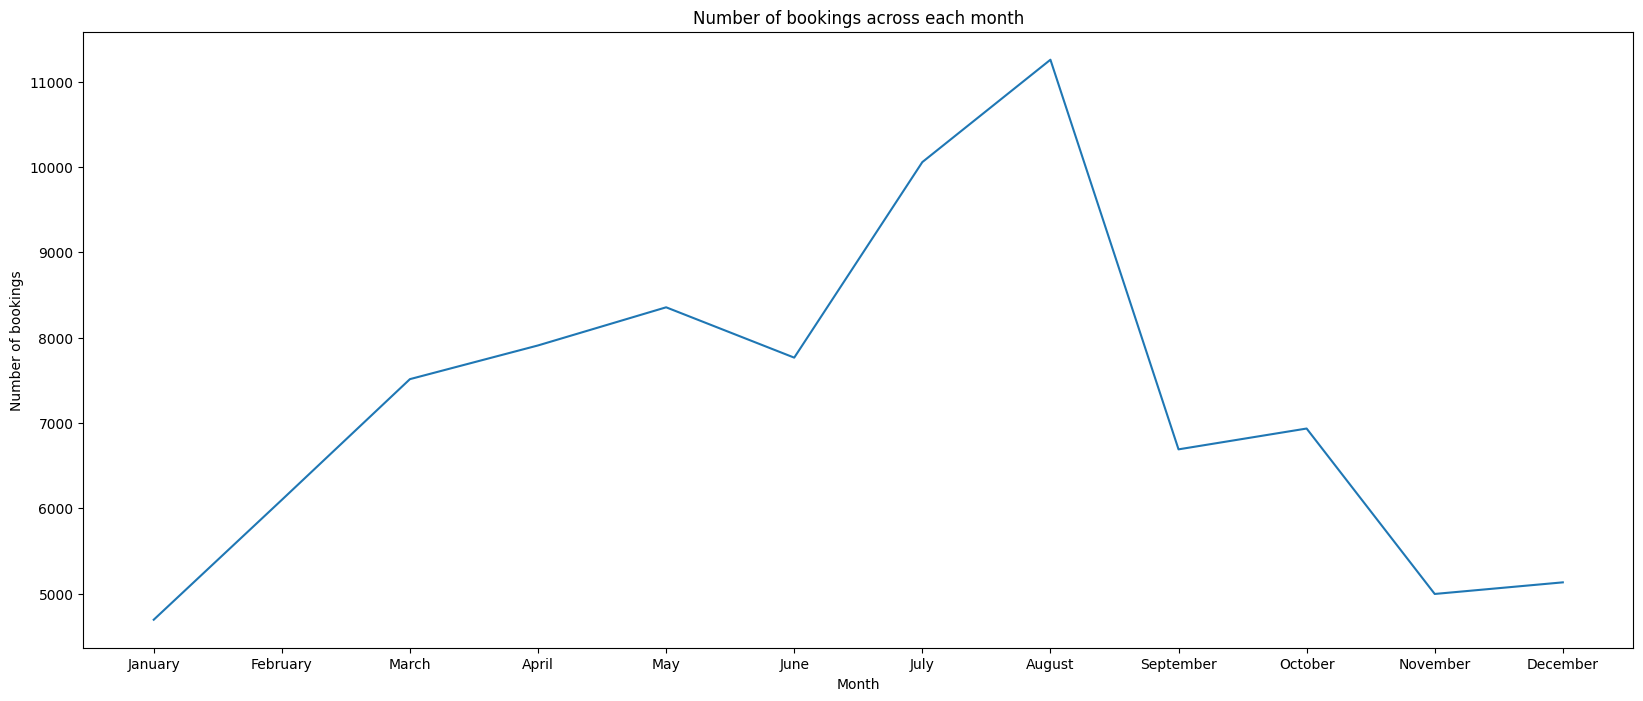

In [ ]:

plt.figure(figsize=(20,8))


sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])


plt.title('Number of bookings across each month')

plt.xlabel('Month')

plt.ylabel('Number of bookings')

 ### **Observation**
 July and August months had the most bookings, 11257 and 10057, respectively. Summer vacation can be the reason for the bookings.

# 7)Total Guests By Market Segment

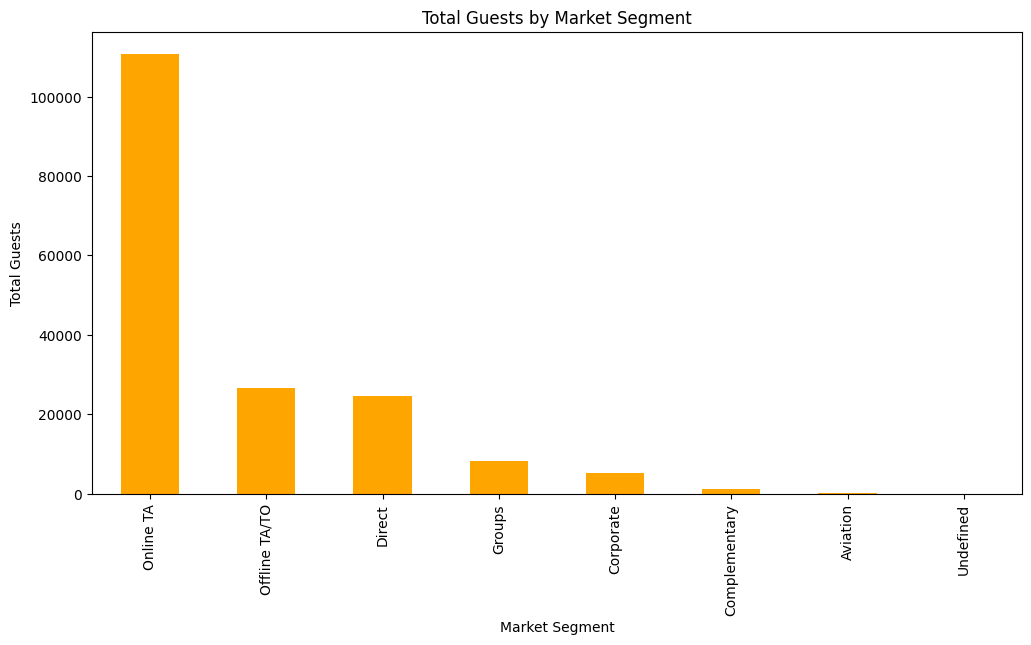

In [ ]:
# Total Guests by Market Segment
plt.figure(figsize=(12, 6))
market_guests = df_copy.groupby('market_segment')['total_guests'].sum().sort_values(ascending=False)
market_guests.plot(kind='bar', color='orange', title='Total Guests by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Guests')
plt.show()

###**Observation**:
### "Online Tour Agents" have the most booking count, more than 100k.

# Bivariate and Multivariate Analysis

In [ ]:
# group by hotel
grup_by_hotel=df_copy.groupby('hotel')

#8) Which Hotel type has  the highest Average Daily Rate (ADR)?

<Axes: title={'center': 'ADR by each Hotel type'}, xlabel='Hotel type', ylabel='ADR'>

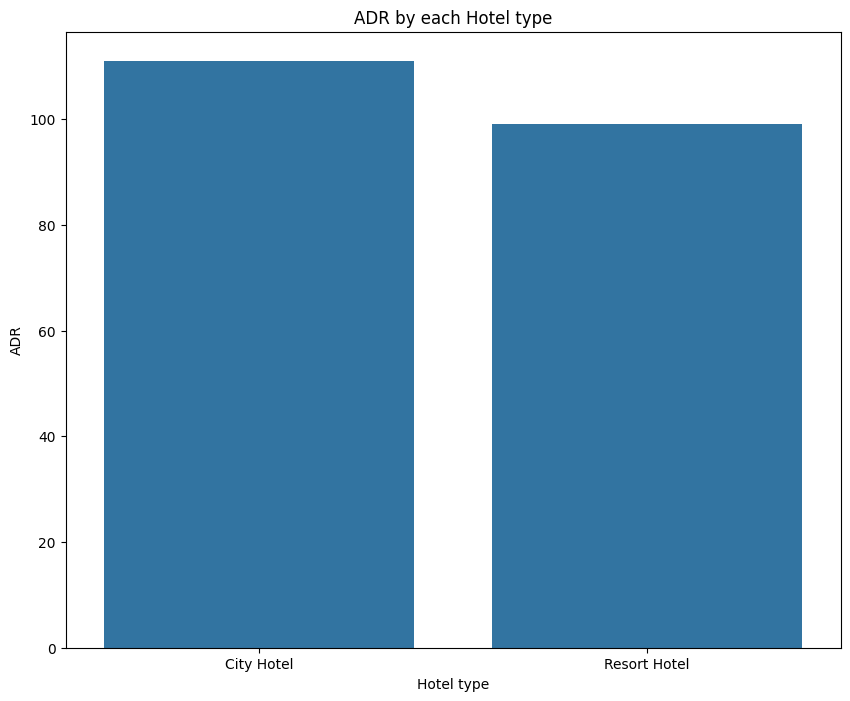

In [ ]:
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()


plt.figure(figsize=(10,8))


plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("ADR by each Hotel type")


sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

### **Observation**
### Despite the fact, adr for both hotel types are nearly close but City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. The more ADR is the more revenue :).

#9) Which hotel has highest percentage of booking cancellation?

Text(0.5, 1.0, 'booking cancellation count')

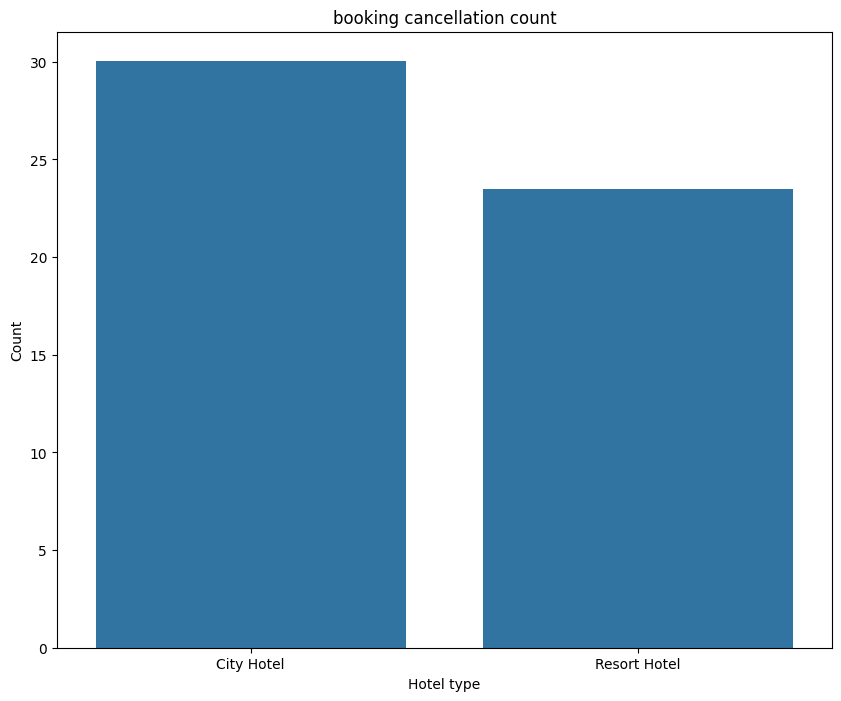

In [ ]:
# booking canceled=1
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df_copy[df_copy['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df_copy.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df


plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])


plt.xlabel('Hotel type')
plt.ylabel('Count')
plt.title("booking cancellation count")

### **Observation**
### Both hotels have nearly same amount of cancellation counts, city hotel 30 and resort hotel less than 25.

#10)ADR across each month?

In [ ]:

bookings_by_months_df=df_copy.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,94.763375
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


Text(0, 0.5, 'ADR')

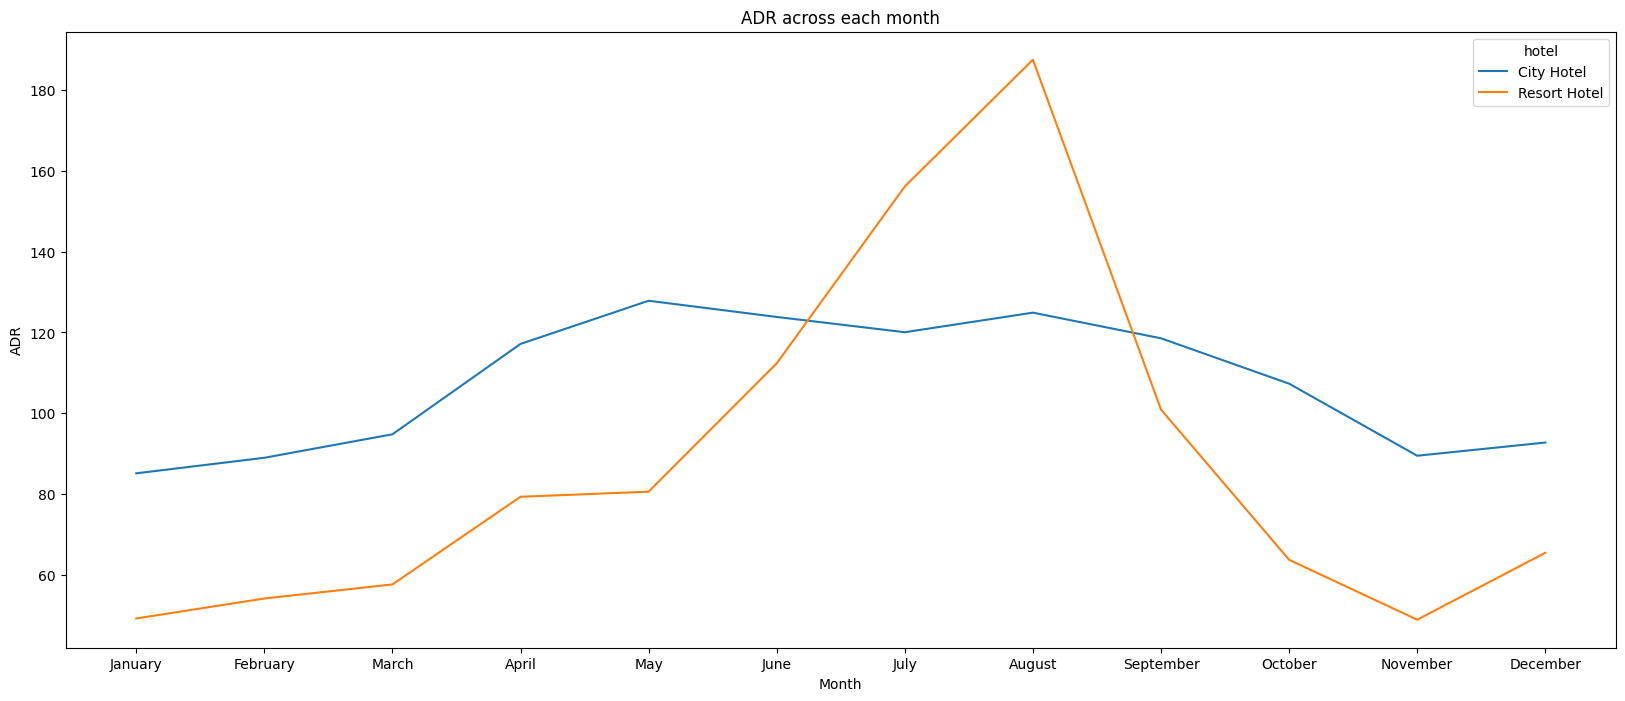

In [ ]:

plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])


plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

### **Observation**

For Resort hotel  ADR is high in the months- June,July,August as compared to City Hotel. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the average daily rate in these monthes is very low.

#11) ADR across different  market segment


Text(0.5, 1.0, 'Adr across market segment')

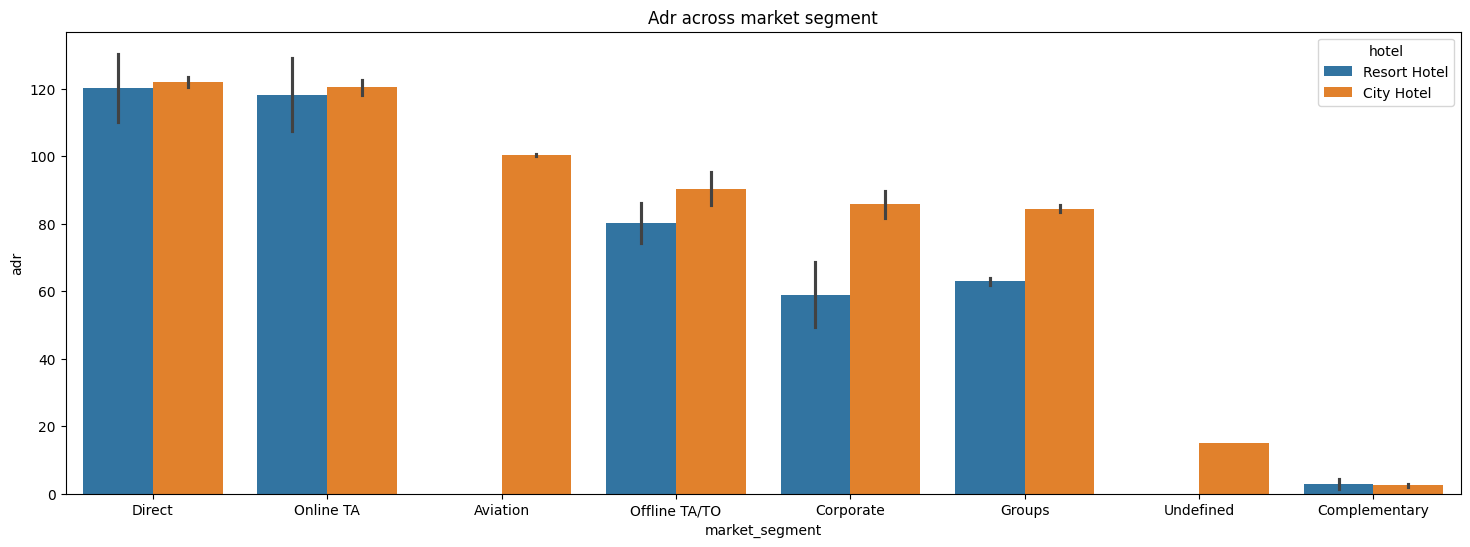

In [ ]:
market_hotel_cancelled_group =df_copy.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by


plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=market_hotel_cancelled_group.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

### **Obseravtion**
### 'Direct' and 'Online TA' are contributing the most in both types of hotels.
### Aviation segment should focus on increasing the bookings of 'Resort Hotel' since there is no contribution by it.

# **Findings**

NOTE: ALL FINDINGS BELONG TO THE YEAR 2015-2017.




1.   City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.
2.   Agent ID no: 9 made most of the bookings between 2015-2017.
3. 27.5 % of the bookings were cancelled.
4. Transient customer type is more which is about more than 70k. Bookings associated by the Group is vey low.
5. Most of the guests are coming from Portugal i.e more than 27000 guests are from Portugal.
6. July and August months had the most bookings, 11257 and 10057, respectively. Summer vacation can be the reason for the bookings.
7. "Online Tour Agents" have the most booking count, more than 100k.
8. Despite the fact, adr for both hotel types are nearly close but City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. The more ADR is the more revenue :)
9. Both hotels have nearly same amount of cancellation counts, city hotel 30 and resort hotel less than 25.
10. For Resort hotel ADR is high in the months- June,July,August as compared to City Hotel. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.
11. 'Direct' and 'Online TA' are contributing the most in both types of hotels.
Aviation segment should focus on increasing the bookings of 'Resort Hotel' since there is no contribution by it.

